In [77]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [17]:
wine = pd.read_excel('D:/workspace/Today-I-Learned/2022-1-MultivariateStatisticalAnalysisForDataMining/Wine.xls')
wine

,Type,Alcohol,Malic_Acid,Ash,Ash_Alcalinity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280_OD315,Proline
0,A,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,A,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,A,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,A,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,A,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,C,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,C,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,C,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,C,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [18]:
x = wine.drop(['Type'], axis=1)
y = wine.Type

In [27]:
feature = x.columns.values
print(feature)
x

['Alcohol' 'Malic_Acid' 'Ash' 'Ash_Alcalinity' 'Magnesium' 'Total_Phenols'
 'Flavanoids' 'Nonflavanoid_Phenols' 'Proanthocyanins' 'Color_Intensity'
 'Hue' 'OD280_OD315' 'Proline']


,Alcohol,Malic_Acid,Ash,Ash_Alcalinity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280_OD315,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [28]:
scaled_x = StandardScaler().fit_transform(x)
final = pd.DataFrame(scaled_x, columns=feature)
final

,Alcohol,Malic_Acid,Ash,Ash_Alcalinity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280_OD315,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


In [32]:
pca = PCA(n_components=2)
pca_x = pca.fit_transform(final)
pca_x_df = pd.DataFrame(pca_x)
pca_x_df

,0,1
0,3.316751,-1.443463
1,2.209465,0.333393
2,2.516740,-1.031151
3,3.757066,-2.756372
4,1.008908,-0.869831
...,...,...
173,-3.370524,-2.216289
174,-2.601956,-1.757229
175,-2.677839,-2.760899
176,-2.387017,-2.297347


In [35]:
final_pca = pd.concat([pca_x_df, y], axis=1)
final_pca

,0,1,Type
0,3.316751,-1.443463,A
1,2.209465,0.333393,A
2,2.516740,-1.031151,A
3,3.757066,-2.756372,A
4,1.008908,-0.869831,A
...,...,...,...
173,-3.370524,-2.216289,C
174,-2.601956,-1.757229,C
175,-2.677839,-2.760899,C
176,-2.387017,-2.297347,C


C:\Users\dmqa\anaconda3\envs\main\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

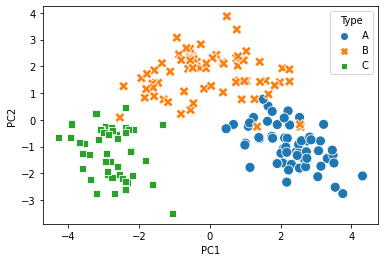

In [40]:
plt.xlabel('PC1')
plt.ylabel('PC2')
sns.scatterplot(final_pca[0], final_pca[1], data=final_pca, hue='Type', style='Type', s=100)

In [42]:
print(pca.explained_variance_ratio_)

[0.36198848 0.1920749 ]


In [43]:
pca2 = PCA()
pca2_x = pca2.fit_transform(final)
pca2_x_df = pd.concat([pd.DataFrame(pca2_x),y], axis=1)

In [44]:
pca2_x_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,Type
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139,0.641443,1.020956,-0.451563,0.540810,-0.066239,A
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416,-0.308847,0.159701,-0.142657,0.388238,0.003637,A
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216,-1.177834,0.113361,-0.286673,0.000584,0.021717,A
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593,0.052544,0.239413,0.759584,-0.242020,-0.369484,A
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700,0.326819,-0.078366,-0.525945,-0.216664,-0.079364,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,1.058527,-0.574164,-1.108788,0.958416,-0.146097,-0.022498,-0.304117,0.139228,0.170786,-0.114427,C
174,-2.601956,-1.757229,0.207581,0.349496,0.255063,-0.026465,0.146894,-0.552427,-0.097969,-0.206061,0.258198,-0.279431,-0.187371,C
175,-2.677839,-2.760899,-0.940942,0.312035,1.271355,0.273068,0.679235,0.047024,0.001222,-0.247997,0.512492,0.698766,0.072078,C
176,-2.387017,-2.297347,-0.550696,-0.688285,0.813955,1.178783,0.633975,0.390829,0.057448,0.491490,0.299822,0.339821,-0.021866,C


[0.36198848 0.1920749  0.11123631 0.0706903  0.06563294 0.04935823
 0.04238679 0.02680749 0.02222153 0.01930019 0.01736836 0.01298233
 0.00795215]


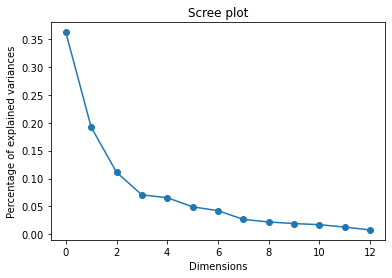

In [46]:
plt.title('Scree plot')
plt.xlabel('Dimensions')
plt.ylabel('Percentage of explained variances')
plt.plot(pca2.explained_variance_ratio_,'o-')
print(pca2.explained_variance_ratio_)

In [47]:
final_pca = PCA(n_components=4)
final_pca_x = final_pca.fit_transform(final)
final_pca_x_df = pd.concat([pd.DataFrame(final_pca_x),y], axis=1)

In [49]:
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=feature)
loadings

,PC1,PC2
Alcohol,0.144329,-0.483652
Malic_Acid,-0.245188,-0.224931
Ash,-0.002051,-0.316069
Ash_Alcalinity,-0.239320,0.010591
Magnesium,0.141992,-0.299634
Total_Phenols,0.394661,-0.065040
Flavanoids,0.422934,0.003360
Nonflavanoid_Phenols,-0.298533,-0.028779
Proanthocyanins,0.313429,-0.039302
Color_Intensity,-0.088617,-0.529996


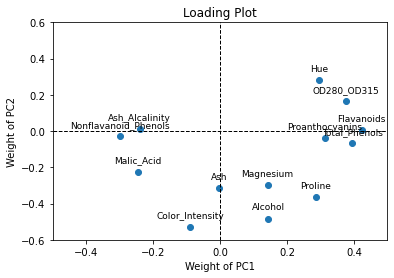

In [76]:
plt.title('Loading Plot')
plt.xlabel('Weight of PC1')
plt.ylabel('Weight of PC2')
plt.xlim(-0.5,0.5)
plt.ylim(-0.6,0.6)
plt.axhline(y=0, color='black', linestyle = '--', linewidth = 1)
plt.axvline(x=0, color='black', linestyle = '--', linewidth = 1)
plt.scatter(x=loadings.PC1, y=loadings.PC2)

for i in range(len(loadings)):
    height = loadings.PC2[i]
    plt.text(x=loadings.PC1[i], y=height+0.05,s=feature[i], ha='center', size = 9)

plt.show()


In [61]:
feature

array(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcalinity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280_OD315',
       'Proline'], dtype=object)